## [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

In [128]:
from sklearn import datasets, metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [129]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [130]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [131]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [132]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.         0.67124791 0.32875209]


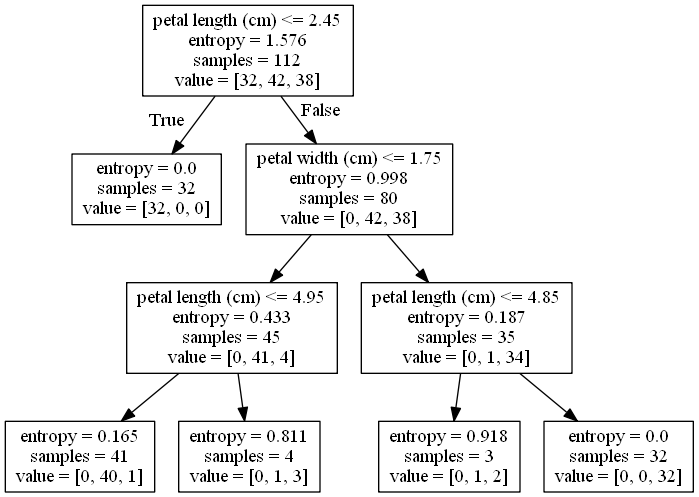

In [133]:
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

ANS1：調整參數會改變Feature importance。

In [134]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print("Feature names: ", wine.feature_names)

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9444444444444444
Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01469337 0.         0.         0.01691927 0.07453111 0.
 0.41065195 0.         0.02984936 0.11576966 0.         0.
 0.33758529]


In [135]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

print("Feature names: ", boston.feature_names)

print("Feature importance: ", clf.feature_importances_)

Mean squared error: 25.20
Feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.04445168 0.00125421 0.00401408 0.0009699  0.02923673 0.57711073
 0.00722702 0.07743093 0.00168247 0.01202116 0.01407845 0.00791344
 0.2226092 ]


ANS2：決策樹的ACC高於回歸模型